<a href="https://colab.research.google.com/github/albysource/pneumonia_segmentation/blob/main/Chest_X_Ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"albynn","key":"191feb1b2346cbc06b05e44750a9f67e"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt install unzip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [27]:
!mkdir CHEST

In [ ]:
!unzip  /content/proj/Chest_X_ray.zip -d /content/CHEST

In [29]:
import warnings
warnings.filterwarnings ('ignore')

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import math 
import shutil
import glob


In [ ]:
#count the numebbr of images in the respecitve classes 
ROOT_DIR = "/content/proj"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

#Building the Model 

In [31]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential 
from keras_preprocessing.image import ImageDataGenerator
import keras 

In [32]:
# Builing the CNN Model 

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size=(3,3), activation= 'relu', input_shape=(224,224,3)))

model.add(Conv2D(filters = 36, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))



model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation = 'relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(units=1,activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [33]:
model.compile(optimizer = 'adam',loss = keras.losses.binary_crossentropy, metrics=['accuracy'])

# Data Prepration using 

In [35]:
def preprocessingImages(path):

  #input will be the path 
  #outpu will be the processed images 

  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory = path , target_size=(224,224), batch_size = 32,class_mode='binary')

  return image 
  

In [36]:
path = "/content/CHEST/train"
train_data = preprocessingImages(path )

Found 5216 images belonging to 2 classes.


In [37]:
def preprocessingImages1(path):

  #input will be the path 
  #outpu will be the processed images 

  image_data = ImageDataGenerator(rescale=1/25)
  image = image_data.flow_from_directory(directory = path , target_size=(224,224), batch_size = 32,class_mode='binary')

  return image 

In [38]:
path = "/content/CHEST/test"
test_data = preprocessingImages1(path)

Found 624 images belonging to 2 classes.


In [41]:
path = "/content/CHEST/val"
val_data = preprocessingImages1(path)

Found 16 images belonging to 2 classes.


In [42]:
# Early Stoping 
from keras.callbacks import ModelCheckpoint, EarlyStopping 

es = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience =6, verbose=1, mode='auto')

mc = ModelCheckpoint(monitor="val_accuracy",filepath = "./bestmodel.h5", verbose =1, save_best_only = True, mode='auto')

cd = [es,mc]



In [ ]:
hs = model.fit_generator(generator = train_data,steps_per_epoch=8,epochs=30,verbose=1,validation_data = val_data,validation_steps= 16,callbacks=cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.9544 - accuracy: 0.5234


Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./bestmodel.h5
8/8 [==============================] - 48s 6s/step - loss: 0.9544 - accuracy: 0.5234 - val_loss: 6.9123 - val_accuracy: 0.5000
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.5638 - accuracy: 0.7578

8/8 [==============================] - 44s 5s/step - loss: 0.5638 - accuracy: 0.7578
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.5939 - accuracy: 0.7148

8/8 [==============================] - 47s 6s/step - loss: 0.5939 - accuracy: 0.7148
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.5378 - accuracy: 0.7266

8/8 [==============================] - 44s 5s/step - loss: 0.5378 - accuracy: 0.7266
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 0.5159 - accuracy: 0.7344

8/8 [==============================] - 48s 6s/step - loss: 0.5159 - accuracy: 0.7344
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 0.4199 - accuracy: 0.7617

8/8 [==============================] - 43s 5s/step - loss: 0.4199 - accuracy: 0.7617
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 0.4095 - accuracy: 0.7656

8/8 [==============================] - 43s 5s/step - loss: 0.4095 - accuracy: 0.7656
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 0.4541 - accuracy: 0.7812

8/8 [==============================] - 43s 5s/step - loss: 0.4541 - accuracy: 0.7812
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 0.4093 - accuracy: 0.7930

8/8 [==============================] - 43s 5s/step - loss: 0.4093 - accuracy: 0.7930
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 0.3292 - accuracy: 0.8125

8/8 [==============================] - 42s 5s/step - loss: 0.3292 - accuracy: 0.8125
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 0.2994 - accuracy: 0.8438

8/8 [==============================] - 42s 5s/step - loss: 0.2994 - accuracy: 0.8438
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 0.3101 - accuracy: 0.8516

8/8 [==============================] - 43s 5s/step - loss: 0.3101 - accuracy: 0.8516
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 0.3117 - accuracy: 0.8672

8/8 [==============================] - 42s 5s/step - loss: 0.3117 - accuracy: 0.8672
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 0.2759 - accuracy: 0.8828

8/8 [==============================] - 43s 5s/step - loss: 0.2759 - accuracy: 0.8828
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 0.2986 - accuracy: 0.8555

8/8 [==============================] - 45s 5s/step - loss: 0.2986 - accuracy: 0.8555
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 0.2505 - accuracy: 0.8672

8/8 [==============================] - 44s 5s/step - loss: 0.2505 - accuracy: 0.8672
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 0.3283 - accuracy: 0.8750

8/8 [==============================] - 46s 6s/step - loss: 0.3283 - accuracy: 0.8750
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 0.2833 - accuracy: 0.8672

8/8 [==============================] - 44s 5s/step - loss: 0.2833 - accuracy: 0.8672
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 0.3341 - accuracy: 0.8906

8/8 [==============================] - 44s 5s/step - loss: 0.3341 - accuracy: 0.8906
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 0.2917 - accuracy: 0.8945

8/8 [==============================] - 46s 6s/step - loss: 0.2917 - accuracy: 0.8945
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 0.3180 - accuracy: 0.8789

8/8 [==============================] - 44s 5s/step - loss: 0.3180 - accuracy: 0.8789
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 0.2319 - accuracy: 0.9180

8/8 [==============================] - 44s 5s/step - loss: 0.2319 - accuracy: 0.9180
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 0.2572 - accuracy: 0.8906

8/8 [==============================] - 48s 6s/step - loss: 0.2572 - accuracy: 0.8906
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 0.3089 - accuracy: 0.8828

8/8 [==============================] - 46s 6s/step - loss: 0.3089 - accuracy: 0.8828
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 0.2606 - accuracy: 0.8867

8/8 [==============================] - 45s 6s/step - loss: 0.2606 - accuracy: 0.8867
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 0.3021 - accuracy: 0.8633

8/8 [==============================] - 45s 6s/step - loss: 0.3021 - accuracy: 0.8633
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 0.2052 - accuracy: 0.9062

8/8 [==============================] - 46s 6s/step - loss: 0.2052 - accuracy: 0.9062
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 0.2649 - accuracy: 0.8906

8/8 [==============================] - 44s 5s/step - loss: 0.2649 - accuracy: 0.8906
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 0.2486 - accuracy: 0.9023

8/8 [==============================] - 45s 6s/step - loss: 0.2486 - accuracy: 0.9023


In [44]:
# Graphical Interpretation of Our Model 

h = hs.history 
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

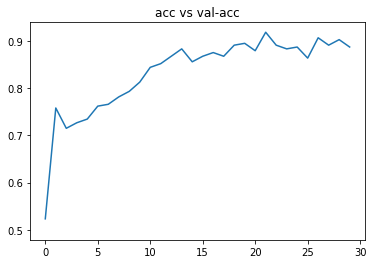

In [45]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")

plt.title('acc vs val-acc')
plt.show()

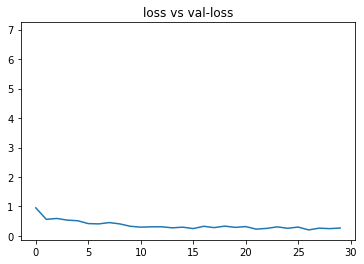

In [46]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")

plt.title('loss vs val-loss')
plt.show()

In [47]:
# Model Accuracy 

from keras.models import load_model 

model = load_model("/content/bestmodel.h5")

# Model Accuracy 

In [48]:
acc = model.evaluate_generator(test_data)[1]

print(f"the accuracy of the model is {acc*100}%")

the accuracy of the model is 62.5%


In [49]:
from tensorflow.keras.utils import load_img,img_to_array

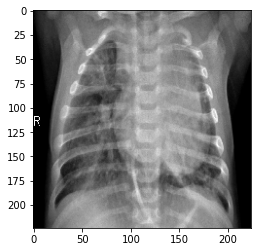

1/1 [==============================] - 0s 78ms/step
The Scan Shows sign of Pneumonia


In [54]:
path ="/content/CHEST/test/PNEUMONIA/person100_bacteria_475.jpeg"

img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255


plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)

pred = model.predict(input_arr)[0][0]
pred

if pred == 0:
  print("The scan shows no sign of Pneumonia")
else:
  print("The Scan Shows sign of Pneumonia")

In [52]:
train_data.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}